In [16]:
# importing essential libraries
import cv2
import numpy as np
import matplotlib.pyplot as plt
import glob
%matplotlib qt

In [6]:
# Make a list of calibration images
images = glob.glob('camera_cal/calibration*.jpg')

In [7]:
# prepare object points, like (0,0,0), (1,0,0), (2,0,0) ....,(6,5,0)
objp = np.zeros((6*9,3), np.float32)
objp[:,:2] = np.mgrid[0:9, 0:6].T.reshape(-1,2)

# Arrays to store object points and image points from all the images.
objpoints = [] # 3d points in real world space
imgpoints = [] # 2d points in image plane.

In [9]:
# Step through the list and search for chessboard corners
output_folder = 'output_images/calibrated_output/'
written_files = 0
total_files = 0
for idx, fname in enumerate(images):
    total_files += 1
    img = cv2.imread(fname)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    # Find the chessboard corners
    ret, corners = cv2.findChessboardCorners(gray, (9,6), None)
    # If found, add object points, image points
    if ret == True:
        written_files += 1
        objpoints.append(objp)
        imgpoints.append(corners)

        # Draw and display the corners
        cv2.drawChessboardCorners(img, (9,6), corners, ret)
        write_name = output_folder + 'corners_found'+str(idx)+'.jpg'
        cv2.imwrite(write_name, img)

In [10]:
# difference in number of files shows that corners for three of the images weren't found
print(total_files)
print(written_files)

20
17


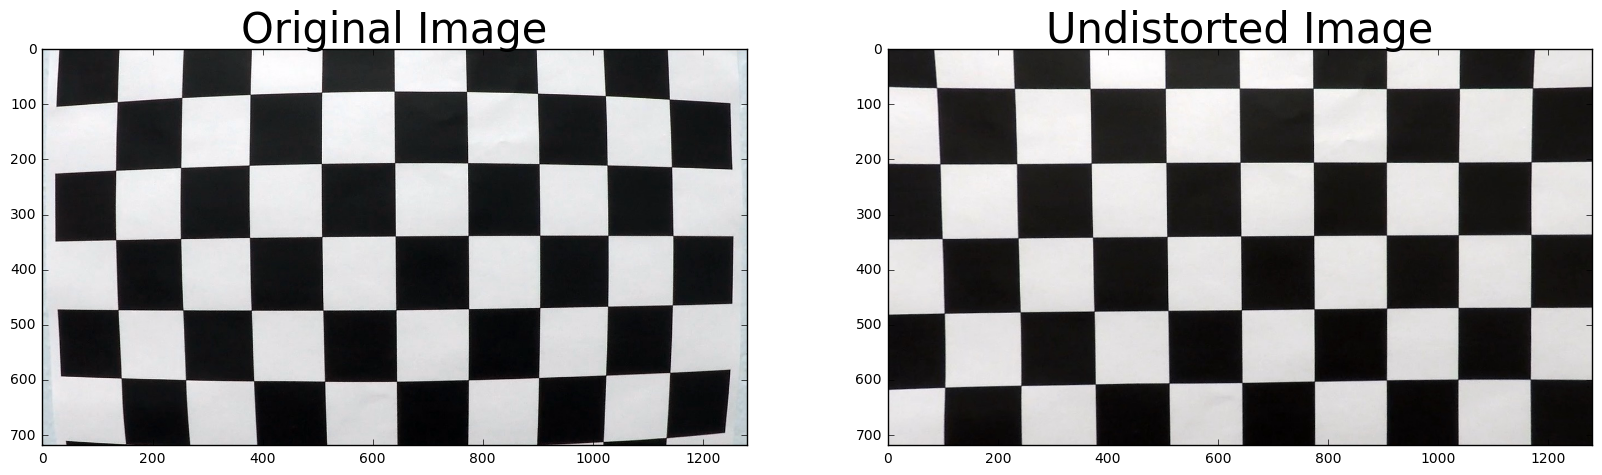

In [17]:
import pickle

# Test undistortion on an image
img = cv2.imread('camera_cal/calibration1.jpg')
img_size = (img.shape[1], img.shape[0])

# Do camera calibration given object points and image points
ret, mtx, dist, rvecs, tvecs = cv2.calibrateCamera(objpoints, imgpoints, img_size,None,None)


dst = cv2.undistort(img, mtx, dist, None, mtx)
cv2.imwrite('output_images/calibration1_undistored.jpg',dst)

# Save the camera calibration result for later use
dist_pickle = {}
dist_pickle["mtx"] = mtx
dist_pickle["dist"] = dist
pickle.dump( dist_pickle, open( "calib_data_pickle.p", "wb" ) )
dst = cv2.cvtColor(dst, cv2.COLOR_BGR2RGB)
# Visualize undistortion
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,10))
ax1.imshow(img)
ax1.set_title('Original Image', fontsize=30)
ax2.imshow(dst)
ax2.set_title('Undistorted Image', fontsize=30)

In [14]:
test_images = glob.glob('test_images/test*.jpg')
test_images.append('test_images/straight_lines1.jpg')
test_images.append('test_images/straight_lines2.jpg')

In [28]:
mtx_path = 'calib_data_pickle.p'

for idx, fname in enumerate(test_images):
    file_name = fname.split(sep='/')[1]
    with open(mtx_path, "rb") as input_file:
        calib_data = pickle.load(input_file)
    
    mtx = calib_data["mtx"]
    dist = calib_data["dist"]
    
    img = cv2.imread(fname)
    img_size = (img.shape[1], img.shape[0])
    
    dst = cv2.undistort(img, mtx, dist, None, mtx)
    dst_name = 'output_images/undistorted_test_images/' + file_name.split(sep='.')[0] + '_undist' + str(idx + 1) + '.jpg'
    print(dst_name)
    cv2.imwrite(dst_name, dst)

output_images/undistorted_test_images/test1_undist0.jpg
output_images/undistorted_test_images/test2_undist1.jpg
output_images/undistorted_test_images/test3_undist2.jpg
output_images/undistorted_test_images/test4_undist3.jpg
output_images/undistorted_test_images/test5_undist4.jpg
output_images/undistorted_test_images/test6_undist5.jpg
output_images/undistorted_test_images/straight_lines1_undist6.jpg
output_images/undistorted_test_images/straight_lines2_undist7.jpg


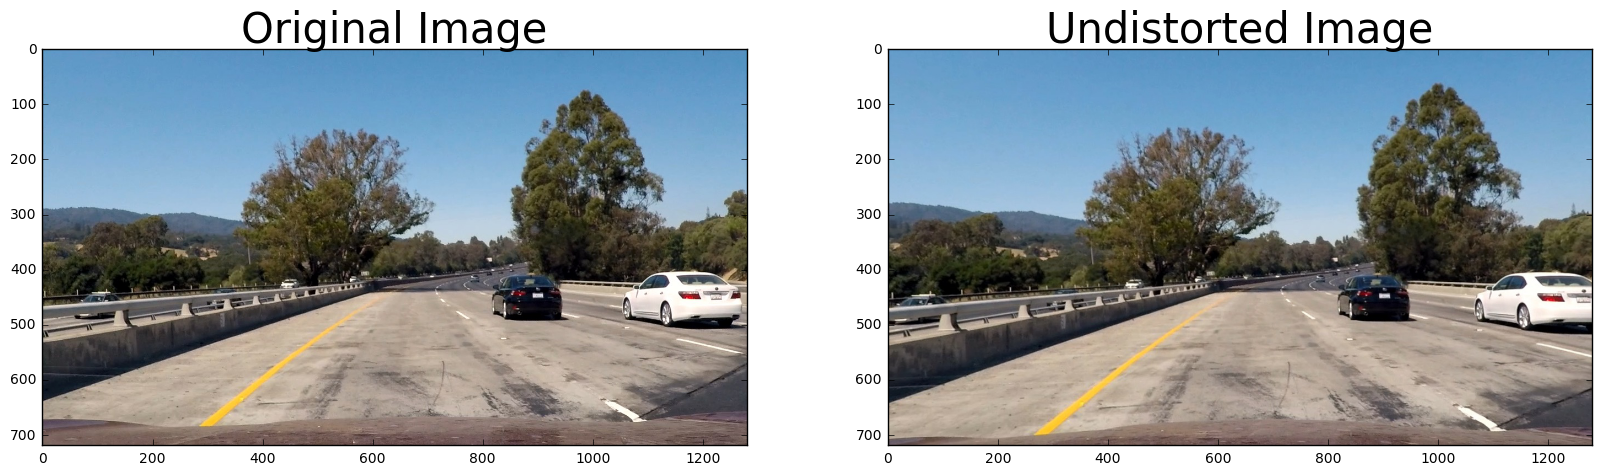

In [21]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,10))
ax1.imshow(plt.imread('test_images/test1.jpg'))
ax1.set_title('Original Image', fontsize=30)
ax2.imshow(plt.imread('output_images/undistorted_test_images/0_undist.jpg'))
ax2.set_title('Undistorted Image', fontsize=30)